Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
Реализовать самостоятельно логистическую регрессию  
    Обучить ее методом градиентного спуска  
    Методом nesterov momentum  
    Методом rmsprop  

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

В качестве dataset'а взять Iris, оставив 2 класса: Iris Versicolor и Iris Virginica  

In [2]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])
df = pd.concat([X, y], axis=1)

Возьмем только 2 класса Iris Versicolor и Iris Virginica (индексы 1 и 2)

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = df[(df['target'] == 1) | (df['target'] == 2)]
df['target'] = df['target'].map({1 : 0, 2 : 1})
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])
df.target.value_counts()

1    50
0    50
Name: target, dtype: int64

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


Построим логистическую регрессию, чтобы посмотреть качество и коэффициенты

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df.drop('target', axis=1))
df_scaled = scaler.transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop('target', axis=1).columns)

In [8]:
from sklearn.model_selection import train_test_split

X = df_scaled
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

1.0


Реализуем логистическую регрессию

In [9]:
from scipy.special import expit
from sklearn.metrics import log_loss

def cost_function(features, labels, weights):
    predictions = expit(np.dot(features, weights))
    return log_loss(labels, predictions, eps=1e-15)

def update_weights_gradient_descent(features, labels, weights, learning_rate):
    predictions = expit(np.dot(features, weights))
    # градиент имеет вид, подобный виду линейной регрессии
    # с использованием numpy градиент можно записать в супер удобном виде
    gradient = learning_rate / len(features) * np.dot(features.T,  predictions - labels.reshape(-1,1))
    weights -= gradient
    return weights

def update_weights_nesterov_momentum(features, labels, weights, learning_rate):
    predictions = expit(np.dot(features, weights))
    # градиент имеет вид, подобный виду линейной регрессии
    # с использованием numpy градиент можно записать в супер удобном виде
    gradient = learning_rate / len(features) * np.dot(features.T,  predictions - labels.reshape(-1,1))
    weights -= gradient
    return weights


def logreg_train(features, labels, weights, learning_rate=0.0001, epochs=10000):
    cost_history = []
    for i in range(epochs):
        weights = update_weights_gradient_descent(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
    return weights, cost_history

In [10]:
np.ones(len(y)).shape
features = X.as_matrix()
features = np.hstack((X.as_matrix(), np.ones(len(y)).reshape(-1,1)))
features.shape

(100, 5)

Подготовим данные для расчета. Первая перемнная - свободный коэффициент, остальные 4 - коэфициенты при фичах

In [11]:
#weights = np.random.normal(size=(5,)).reshape(-1,1) 
features = np.hstack( (np.ones(len(y)).reshape(-1,1), X.as_matrix() ) )
labels = y.as_matrix()

In [12]:
weights = np.random.normal(size=(5,)).reshape(-1,1) 
new_weighths, cost_history = logreg_train(features=features, labels=labels, 
                                          weights=weights, learning_rate=0.001, epochs=50000)

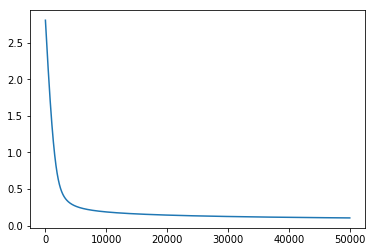

In [13]:
plt.plot(cost_history)

Сравним полученные коэффициенты с полученными результатами LogisticRegression из коробки

In [14]:
print('Полученные результаты : ', new_weighths.T)
print('Эталонные результаты : ', log_reg.intercept_, log_reg.coef_) 

Полученные результаты :  [[ 0.12323604 -0.22100199 -0.69431918  2.43516328  2.69121104]]
Эталонные результаты :  [-0.01591041] [[-0.42343974 -0.43438593  1.97010235  2.30045561]]
